# AgERA5 assessment

Production date: DD-MM-2025
**Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.**

Dataset version: 2.0.

Produced by: C3S2_521 contract.

## 🌍 Use case: Use case listed here in full 

## ❓ Quality assessment question
* **In most cases there should be one question listed here in bold**
* **(In some cases a second related/follow-up question may be included)**

A very short introduction before the assessment statement describing approach taken to answer the user question. One or two key references could be useful,  if the assessment summarises literature (referenced directly in the text, or with numerical labels like this (also listed at the end) `[[1]](https://doi.org/10.1038/s41598-018-20628-2))`giving: [[1]](https://doi.org/10.1038/s41598-018-20628-2)).

[[CDS AgERA5]](https://doi.org/10.24381/cds.6c68c9bb).

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Finding 1
* Finding 2
* Finding 3
* etc
```

## 📋 Methodology

**Agrometeorological indicators from 1979 to present derived from reanalysis** (*AgERA5*; [doi 10.24381/cds.6c68c9bb](https://doi.org/10.24381/cds.6c68c9bb)).

A ‘free text’ introduction to the data analysis steps or a description of the literature synthesis, with a justification of the approach taken, and limitations mentioned. **Mention which CDS catalogue entry is used, including a link, and also any other entries used for the assessment**.

* These headings can be specific to the quality assessment, and help guide the user through the ‘story’ of the assessment. This means we cannot pre-define the sections and headings here, as they will be different for each assessment.
* Sub-bullets could be used to outline what will be done/shown/discussed in each section
* The list below is just an example, or may need more or fewer sections, with different headings

The analysis and results are organised in the following steps, which are detailed in the sections below:

**[](section-setup)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-analysis)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-3)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-4)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.
 
**[](section-5)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

Any further notes on the method could go here (explanations, caveats or limitations).

## 📈 Analysis and results

(section-setup)=
### 1. Data and code setup

#### Import required packages
This notebook uses [earthkit](https://github.com/ecmwf/earthkit) for downloading and processing data.

In [1]:
import earthkit.data as ekd
import earthkit.plots as ekp
import numpy as np
from matplotlib import pyplot as plt

#### Define request and download
We now define our parameters, i.e. which parts of the dataset we want to download:

In [2]:
dataset_ID = "sis-agrometeorological-indicators"

request_default = {
    "version": "2_0",
}

request_default_withtime = request_default | {
    "year": [f"{yr}" for yr in range(2002, 2004)],
    "month": [f"{mo:02}" for mo in range(2, 4)],
    "day": [f"{d:02}" for d in range(8, 11)],
}
request_default_withtime = request_default | {"year": "2002", "month": "02", "day": "02"}

request_temperature = request_default_withtime | {
    "variable": "2m_temperature",
    "statistic": ["24_hour_maximum", "day_time_mean"],
}

request_precipitation = request_default_withtime | {
    "variable": "precipitation_flux",
}

ds = ekd.from_source("cds", dataset_ID, request_temperature, request_precipitation)

2025-08-05 18:32:22,390 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


  0%|          | 0/2 [00:00<?, ?it/s]

2025-08-05 18:32:22,570 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-08-05 18:32:22,588 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-08-05 18:32:22,759 INFO Request ID is 1a7178c1-31a8-4603-84e6-349cf42594cb
2025-08-05 18:32:22,798 INFO Request ID is bcd74a16-1872-466c-9910-8cec4a3370f0
2025-08-05 18:32:22,846 INFO status has been updated to accepted
2025-08-05 18:32:22,881 INFO status has been updated to accepted
2025-08-05 18:32:31,286 INFO status has been updated to running
2025-08-05 18:32:31,370 INFO status has been updated to running
2025-08-05 18:32:36,407 INFO status has been updated to successful
2025-08-05 18:32:36,491 INFO status has been updated to successful


20d89a6ac1c68d8a4dabb60655b118e2.zip:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

64a427431f5d99ee760b9dbd7b906111.zip:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

As a check, we can print the downloaded dataset to inspect its structure:

In [3]:
ds.to_xarray()

<xarray.Dataset> Size: 78MB
Dimensions:                           (time: 1, lon: 3600, lat: 1801)
Coordinates:
  * time                              (time) datetime64[ns] 8B 2002-02-02
  * lon                               (lon) float64 29kB -180.0 -179.9 ... 179.9
  * lat                               (lat) float64 14kB 90.0 89.9 ... -90.0
Data variables:
    Precipitation_Flux                (time, lat, lon) float32 26MB dask.array<chunksize=(1, 901, 1800), meta=np.ndarray>
    crs                               (time) int64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    Temperature_Air_2m_Max_24h        (time, lat, lon) float32 26MB dask.array<chunksize=(1, 901, 1800), meta=np.ndarray>
    Temperature_Air_2m_Mean_Day_Time  (time, lat, lon) float32 26MB dask.array<chunksize=(1, 901, 1800), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.7
    title:        AgERA5 daily weather variables derived from the ECMWF ERA5 ...
    institution:  Wageningen Environmental Research
    history:      Generated by `pragera5 run_daily_processing 2002-02-02` ver...
    references:   https://doi.org/10.24381/cds.6c68c9bb
    source:       ECWMF ERA5 reanalysis, https://doi.org/10.24381/cds.143582cf

(section-analysis)=
### 2. Analysis

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

In [4]:
temperature = ds.sel(variable="Temperature_Air_2m_Max_24h", time='2002-02-08T00:00:00.000000000')

In [5]:
chart = ekp.Map(domain="Europe")
chart.contour(temperature)
chart.land()
chart.coastlines()
chart.title()
chart.show()

IndexError: list index out of range

(section-3)=
### 3. Section 3 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included).

In [6]:
import earthkit as ek

data = ek.data.from_source("sample", "era5-2t-msl-1985122512.grib")
pressure = data.sel(short_name="msl")
print(type(temperature))
print(type(pressure))

<class 'earthkit.data.readers.netcdf.fieldlist.NetCDFMultiFieldList'>
<class 'earthkit.data.readers.grib.index.GribMaskFieldList'>


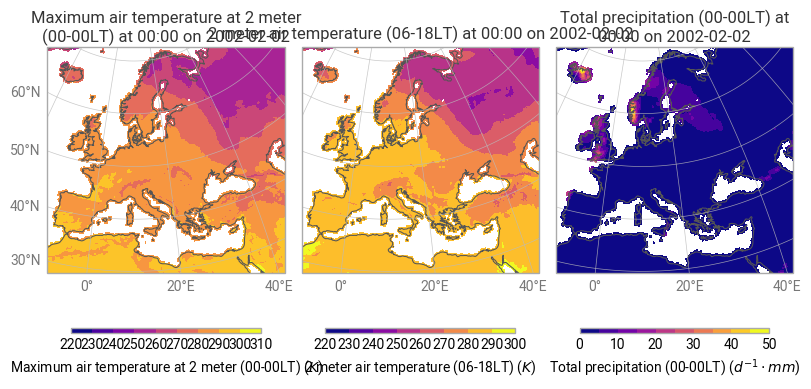

In [8]:
ek.plots.quickplot(ds, domain="Europe", units="celsius")

(section-4)=
### 4. Section 4 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does(if code is included).

(section-5)=
### 5. Section 5 title 

#### Results Subsections
Describe what is done in this step/section and what the `code` in the cell does (if code is included). 

If this is the **results section**, we expect the final plots to be created here with a description of how to interpret them, and what information can be extracted for the specific use case and user question. The information in the 'quality assessment statement' should be derived here. 

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* Earthkit
  * [earthkit-data](https://github.com/ecmwf/earthkit)
  * [earthkit-plots](https://github.com/ecmwf/earthkit-plots)

### References
[[CDS AgERA5]](https://doi.org/10.24381/cds.6c68c9bb) Boogaard, H., Schubert, J., De Wit, A., Lazebnik, J., Hutjes, R., Van der Grijn, G., (2020): Agrometeorological indicators from 1979 to present derived from reanalysis. Copernicus Climate Change Service (C3S) Climate Data Store (CDS). DOI: 10.24381/cds.6c68c9bb (Accessed on DD-MMM-YYYY)